In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model import Market
import seaborn as sns
from agents import Firm
from model import Market

import networkx as nx


In [22]:
n_households = 50
n_firms = 5
firms_production = 12
min_income = 0
max_income = 10
min_quality = 0
max_quality = 1
decrease_price = 0.7
increase_price = 0.3
price_change = 0.01
toy_mode = False

model = Market(F =n_firms, H=n_households, firms_production=firms_production, min_income=min_income, max_income=max_income, 
                min_quality=min_quality, max_quality=max_quality, decrease_price=decrease_price, increase_price=increase_price, price_change=price_change, toy_mode=toy_mode)
steps = 10
for i in range(steps):
    #print('step', i)
    model.step()
    

In [23]:
a = model.datacollector.get_agent_vars_dataframe()
a

Type   Quality   Revenue  Quantity_sold     Price  \
Step AgentID                                                           
0    1        Household       NaN       NaN            NaN       NaN   
     2        Household       NaN       NaN            NaN       NaN   
     3        Household       NaN       NaN            NaN       NaN   
     4        Household       NaN       NaN            NaN       NaN   
     5        Household       NaN       NaN            NaN       NaN   
...                 ...       ...       ...            ...       ...   
9    51            Firm  0.891237  12.99428           12.0  1.093685   
     52            Firm  0.255886  12.99428           12.0  1.093685   
     53            Firm  0.562647  12.99428           12.0  1.093685   
     54            Firm  0.181594  12.99428           12.0  1.093685   
     55            Firm  0.583694  12.99428           12.0  1.093685   

              Initial_budget    budget  
Step AgentID                            
0    1              5.130458  5.130458  
     2              8.901272  8.901272  
     3              9.506070  9.506070  
     4              8.827915  8.827915  
     5              2.956526  2.956526  
...                      ...       ...  
9    51                  NaN       NaN  
     52                  NaN       NaN  
     53                  NaN       NaN  
     54                  NaN       NaN  
     55                  NaN       NaN  

[550 rows x 7 columns]

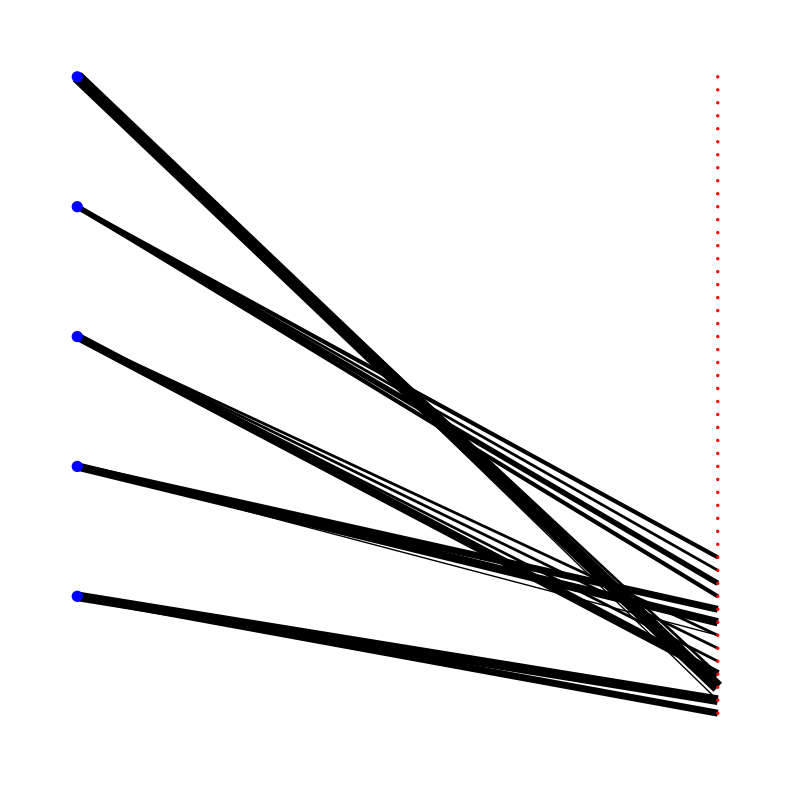

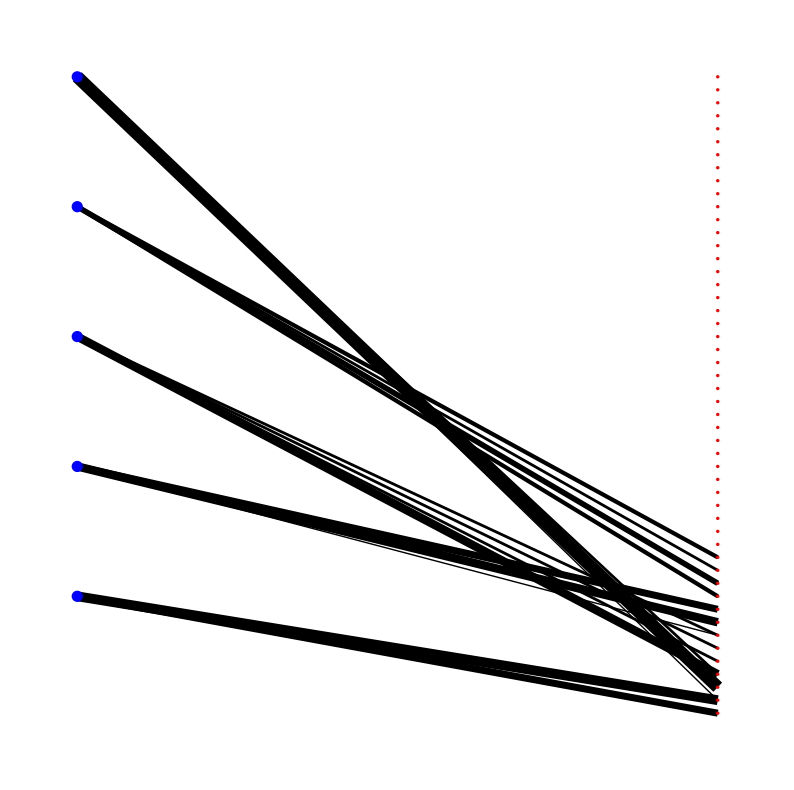

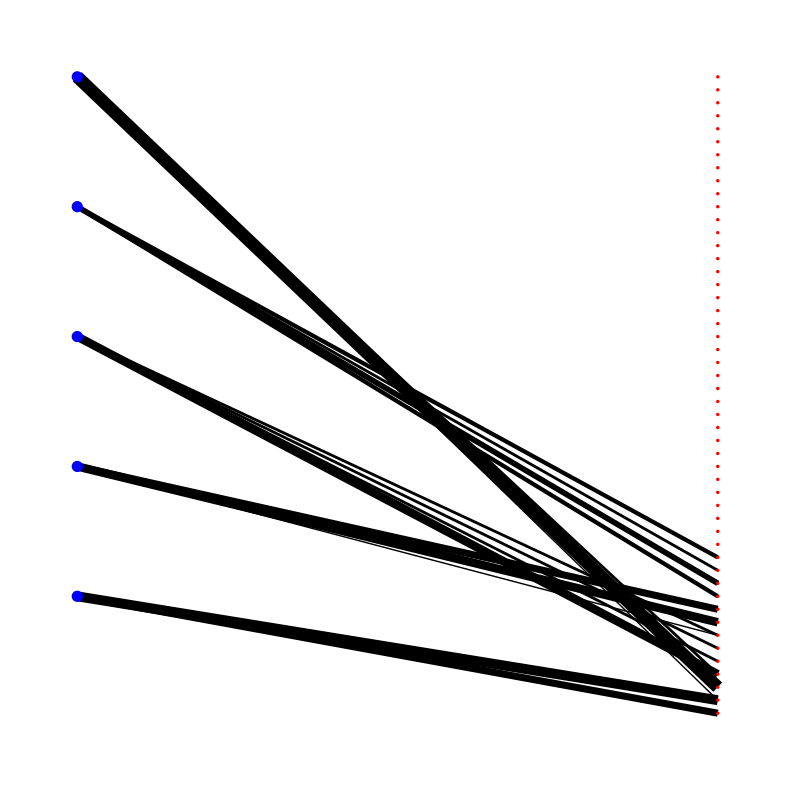

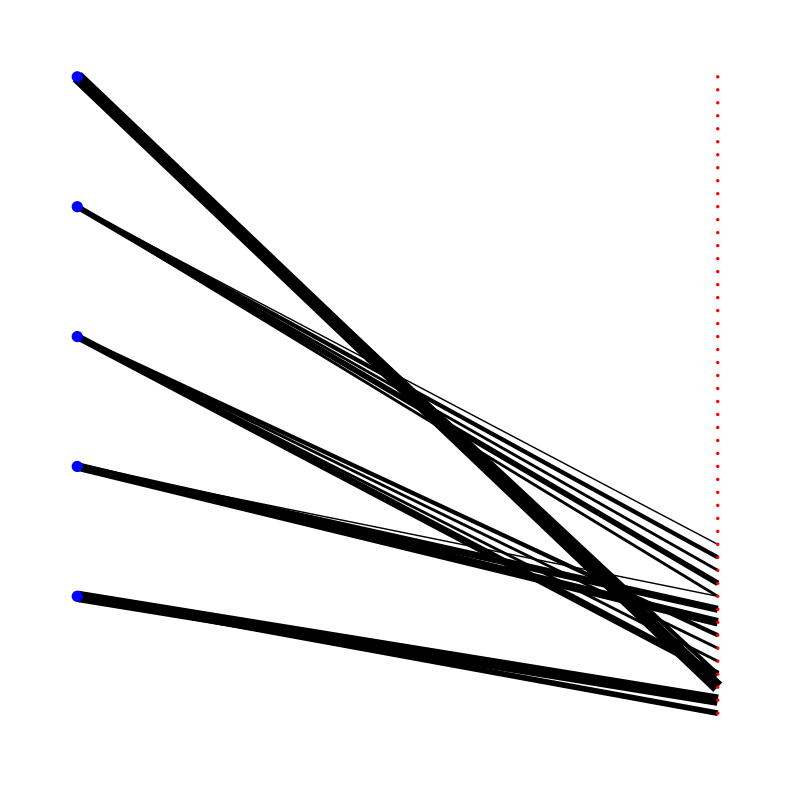

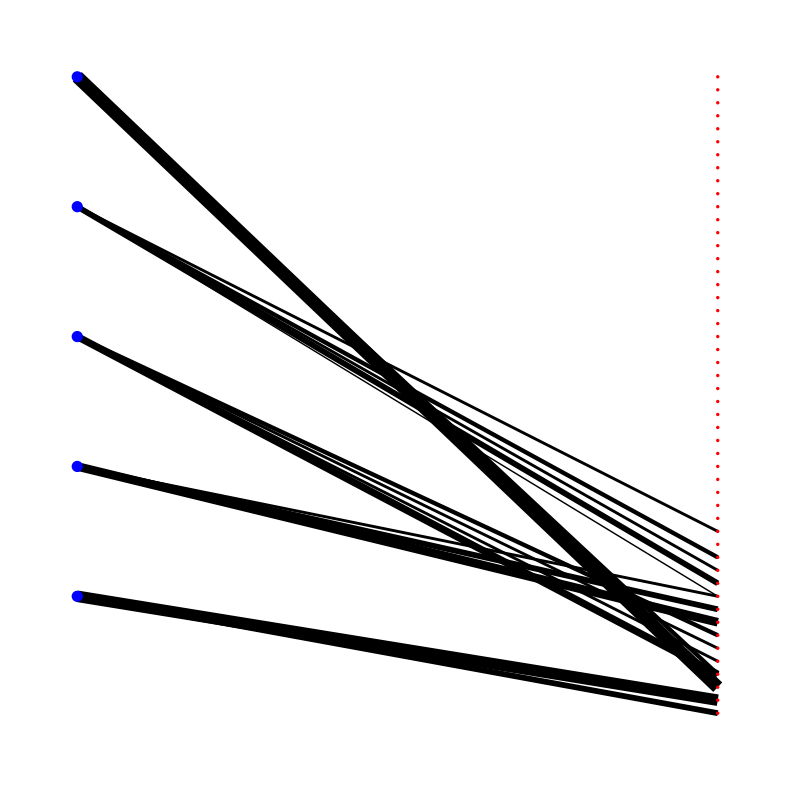

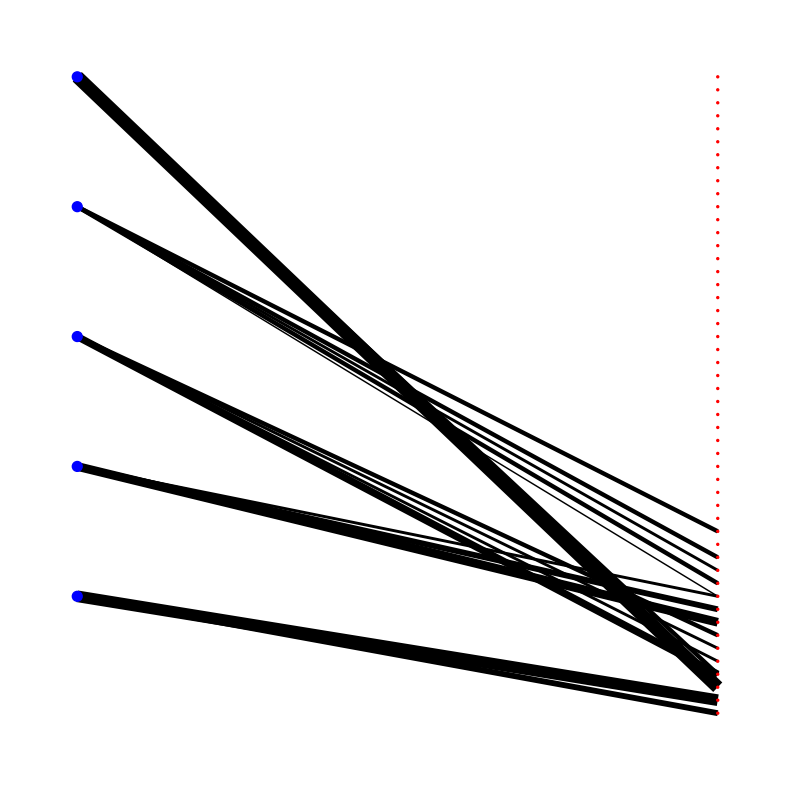

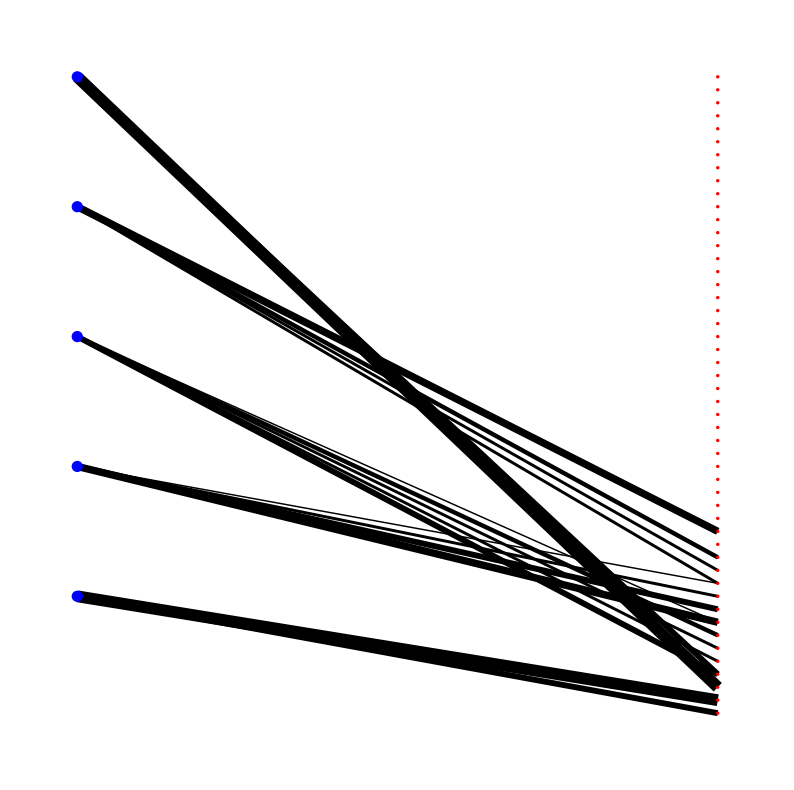

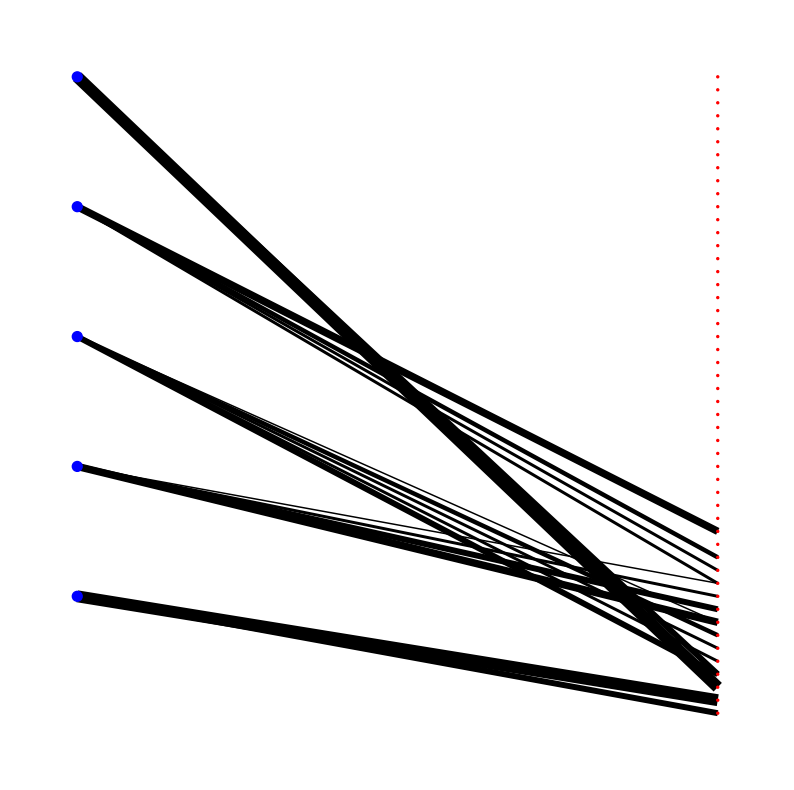

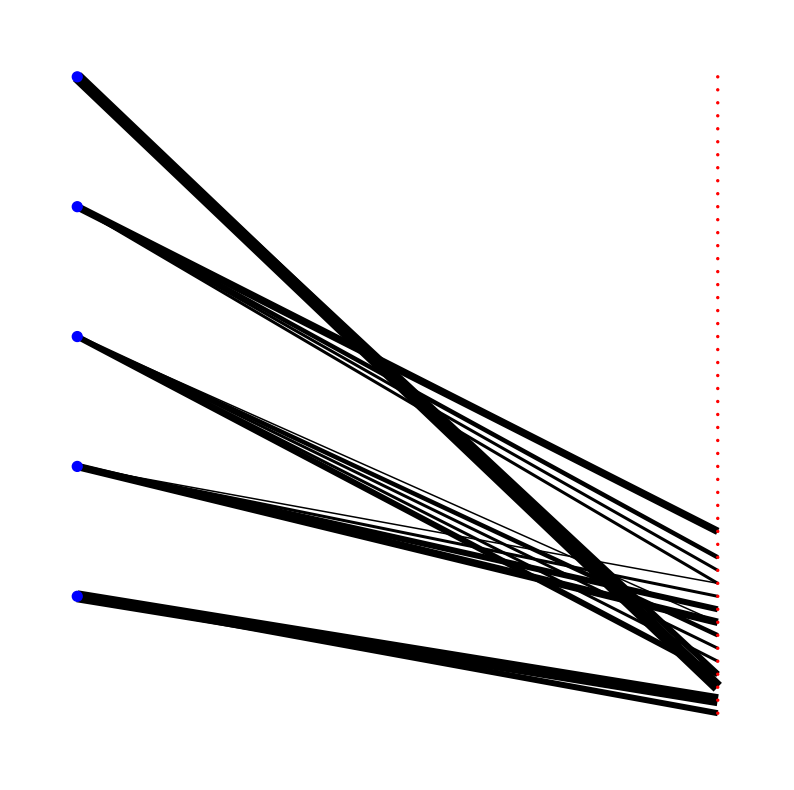

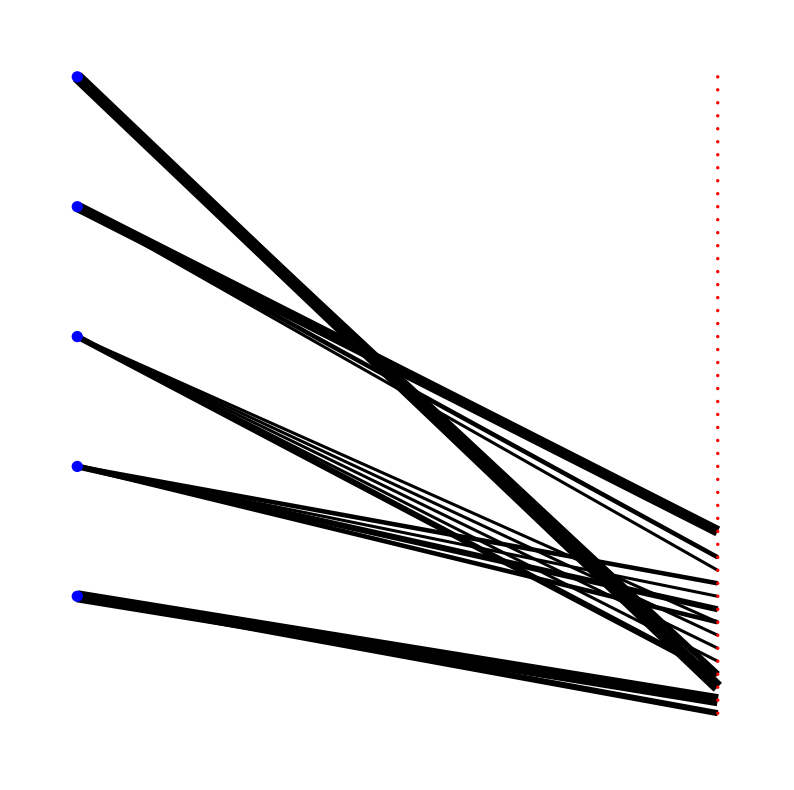

In [24]:
# draw the graph of the last step with  Weight
# remove the nodes with no edges
for i in range(len(model.graphs)):
    if i % 1 == 0:
        # model.graphs[i].remove_nodes_from(list(nx.isolates(model.graphs[i])))
        # color the nodes by type
        color_map = []
        node_map = []
        pos = {}
        f = 1
        h = 1
        for node in model.graphs[i]:
            if type(node) is Firm:
                color_map.append('blue')
                node_map.append(50)
                pos[node] = (1, f * 10)
                f += 1
            else:
                color_map.append('red')
                node_map.append(2)
                pos[node] = (2, h)
                h += 1
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        # draw the bipartite graph using the node color map

        nx.draw(model.graphs[i], with_labels=False, width=[model.graphs[i][u][v]['weight'] for u,v in model.graphs[i].edges()], node_color = color_map, node_size = node_map, pos=pos)
        #plt.show()



In [25]:
df = model.datacollector.get_agent_vars_dataframe().reset_index()

In [26]:
# for each Step, computes the HHI for each Firm
df_firm = df.loc[df['Type'] == 'Firm']
# normalize df_firm['Revenue'] in each Step
df_firm['Market_share'] = df_firm.groupby(['Step'])['Revenue'].transform(lambda x: x/x.sum())
# square the Market_share
df_firm['R'] = df_firm['Market_share']**2
# compute the HHI
HHI = df_firm.groupby(['Step'])['R'].sum()

#df_firm['HHI'] = df_firm.groupby(['Step'])['Revenue'].transform(lambda x: x**2).groupby(['Step', 'Type']).transform('sum')



/var/folders/cy/01tnmvcx0_d54pv4f2k6dkv40000gn/T/ipykernel_74454/3487603048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firm['Market_share'] = df_firm.groupby(['Step'])['Revenue'].transform(lambda x: x/x.sum())
/var/folders/cy/01tnmvcx0_d54pv4f2k6dkv40000gn/T/ipykernel_74454/3487603048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firm['R'] = df_firm['Market_share']**2


/Users/todd/WWCS_2023_markets/env/lib/python3.9/site-packages/scipy/sparse/_base.py:752: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(


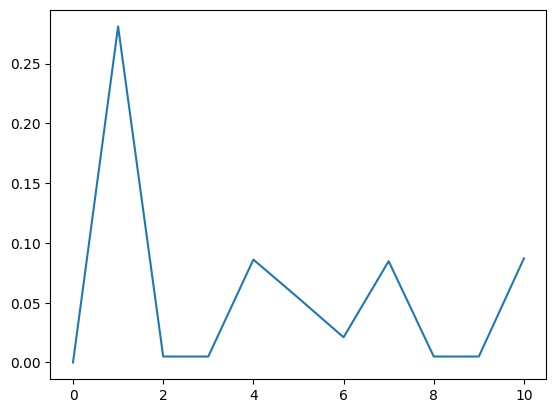

In [27]:
def change_metric(graphs):
    """
    Takes in a list of transaction graphs and returns a list of the change between each
    """
    output = [0]
    for i in range(0, len(graphs)):
        prev = nx.adjacency_matrix(graphs[i-1]).A
        curr = nx.adjacency_matrix(graphs[i]).A
        change = sum(sum(abs(curr - prev)))
        maximum = sum(sum(prev)) + sum(sum(curr))
        output.append(change/maximum)
    return output

our_metric = change_metric(model.graphs)
plt.plot(our_metric)

<AxesSubplot: xlabel='Step'>

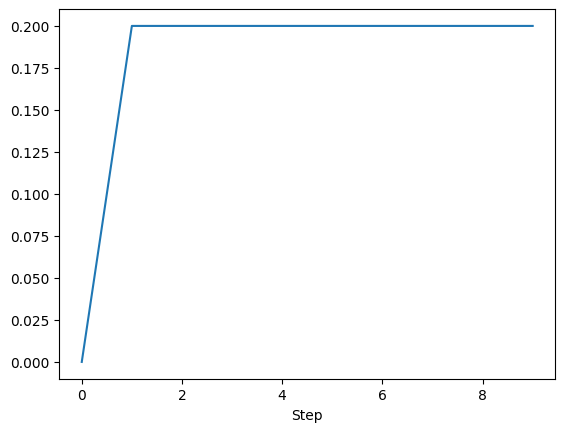

In [28]:
HHI.plot()

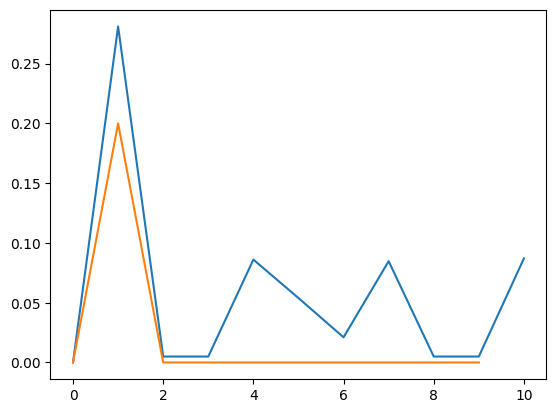

In [29]:
def compute_hhi_diff(hhi):
    hhi_diff = [0]

    for i in range(1, len(hhi)):
        change = abs(hhi[i] - hhi[i-1])
        hhi_diff.append(change)

    return hhi_diff

plt.plot(our_metric)
plt.plot(compute_hhi_diff(HHI))

<AxesSubplot: xlabel='Step', ylabel='budget'>

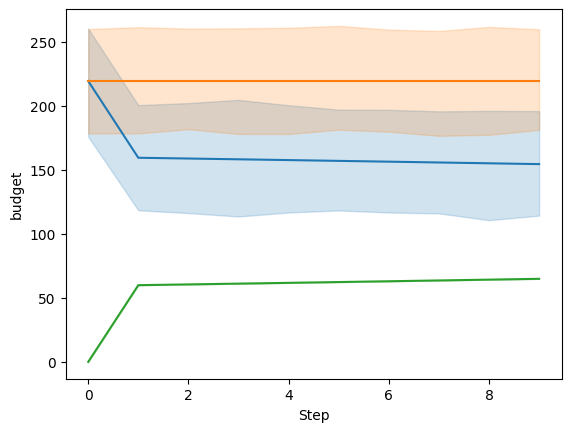

In [30]:
#sns.lineplot(data=df, y='Revenue', x='Step', estimator='sum')
sns.lineplot(data=df, y='budget', x='Step', estimator='sum')
sns.lineplot(data=df, y='Initial_budget', x='Step', estimator='sum')
sns.lineplot(data=df, y='Revenue', x='Step', estimator='sum')


<AxesSubplot: xlabel='Step', ylabel='Price'>

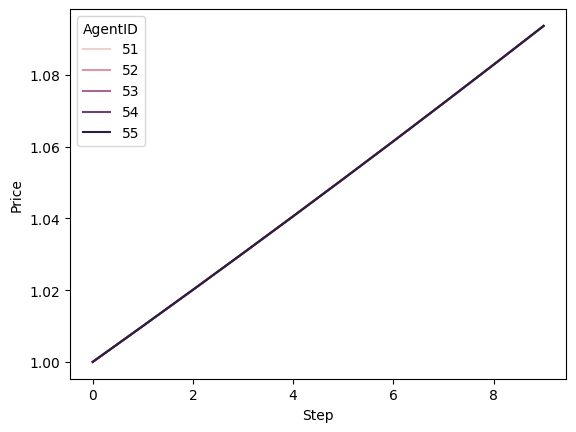

In [31]:
sns.lineplot(data=df_firm, y='Price', x='Step', hue = 'AgentID')

<AxesSubplot: xlabel='Step', ylabel='Quantity_sold'>

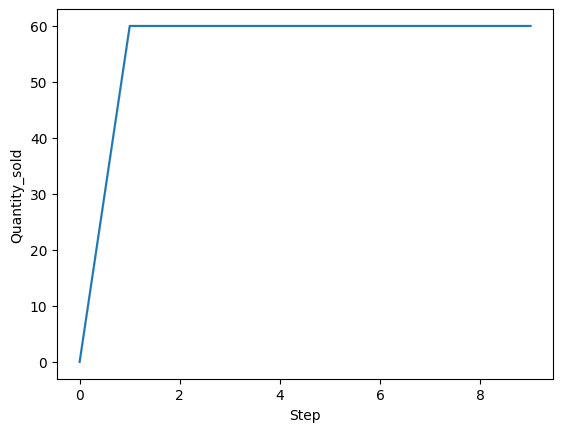

In [32]:
sns.lineplot(data=df, y='Quantity_sold', x='Step', estimator='sum')


In [ ]:
sns.lineplot(data=df, y='Revenue', x='Step')


In [ ]:
sns.lineplot(data=df.loc[df['AgentID'] == 1020],
             y='Revenue', x='Step', hue='AgentID')


In [ ]:
df.loc[(df['Step'] == 0) & (df['Type'] == 'Household')].sort_values('budget')


In [ ]:
df.loc[(df['Step'] == 0) & (df['Type'] == 'Firm')].sort_values('Quality')


In [ ]:
sns.barplot(data=df.loc[(df['Step'] == 0) & (
    df['Type'] == 'Firm')], y='Quality', x='AgentID')


In [ ]:
df.loc[df['AgentID'] == 1009]


In [ ]:

# for each step plot use seaborn to do a 1x2 plot with the distribution of the "Price" and "Revenue" of the firms
for i in range(steps):
    if i % 10 == 0:
        df1 = df[df["Step"] == i]
        df1 = df1[df1["Type"] == "Firm"]
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        sns.histplot(df1["Price"], ax=ax[0])
        sns.histplot(df1["Revenue"], ax=ax[1])
        # set the title of the plot to the step
        fig.suptitle("Step " + str(i))
        plt.show()


In [ ]:
firms = df.loc[df['Type'] == "Firm"]
df.loc[(df['Type'] == "Firm") & (df['Step'] == 99)]['Revenue'].sum()
hhi = pd.DataFrame(data={'step': range(0,100)})
hhi = hhi.assign(volume=lambda x: df.loc[(df['Type'] == "Firm") & (df['Step'] == x.step)]['Revenue'].sum())
hhi 